<span style="font-size: 30px; text-transform: uppercase;">Kaggle Titanic competition</span>


In [148]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandasql import sqldf
from sklearn.linear_model import LogisticRegression

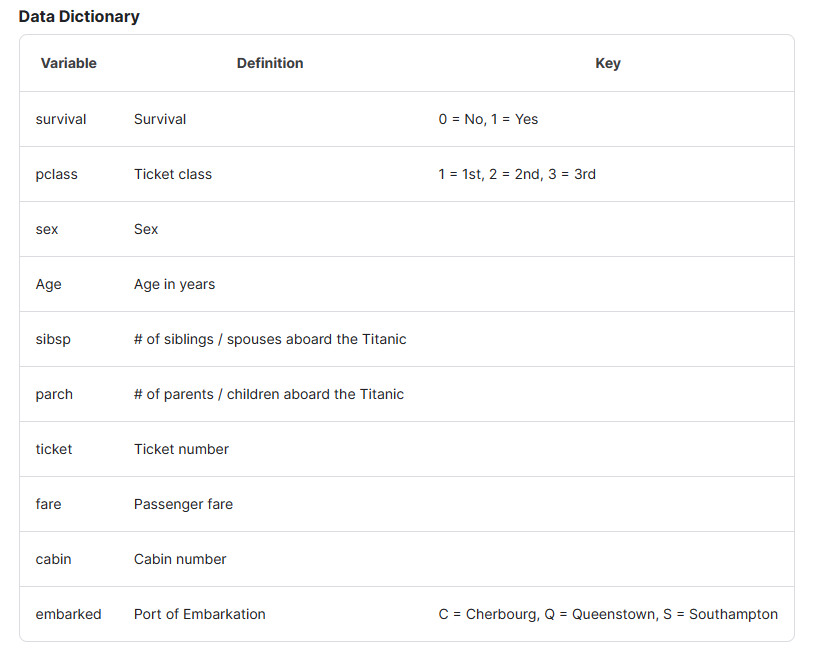


In [149]:
df_test = pd.read_csv('test.csv')
df_train = pd.read_csv('train.csv')
df_submission = pd.read_csv('gender_submission.csv')

In [150]:
df_submission 

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [151]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [152]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


<h1>Tables analysis</h1>

In [153]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [154]:
df_test['Age'].fillna(df_test['Age'].mean(), inplace=True)
df_test['Fare'].fillna(df_test['Fare'].median(), inplace=True)
df_test.isna().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [155]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [156]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [157]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Creating new data frame only with numeric values

In [158]:
columns_to_keep = []
for column in df_train.columns:
    if df_train[column].dtype != 'object':
        columns_to_keep.append(column)
columns_to_keep

['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']

In [159]:
df_train_num = df_train[columns_to_keep]
df_train_num.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
0,1,0,3,22.0,1,0,7.2500
1,2,1,1,38.0,1,0,71.2833
2,3,1,3,26.0,0,0,7.9250
3,4,1,1,35.0,1,0,53.1000
4,5,0,3,35.0,0,0,8.0500


Looks like we have 177 null values in our Age column.
Age will be very valid for our future analysys. So we can delete all null rows or we can fill them with mean values.
By deleting this rows we will lose some information, so I'll fill in these rows

In [160]:
df_train_num['Age'].fillna(df_train_num['Age'].mean(), inplace=True)

C:\Users\LEOPARD\AppData\Local\Temp\ipykernel_10452\2240532008.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train_num['Age'].fillna(df_train_num['Age'].mean(), inplace=True)


Let's check it

In [161]:
df_train_num['Age'].isnull().sum()

0

<h1>Plots</h1>

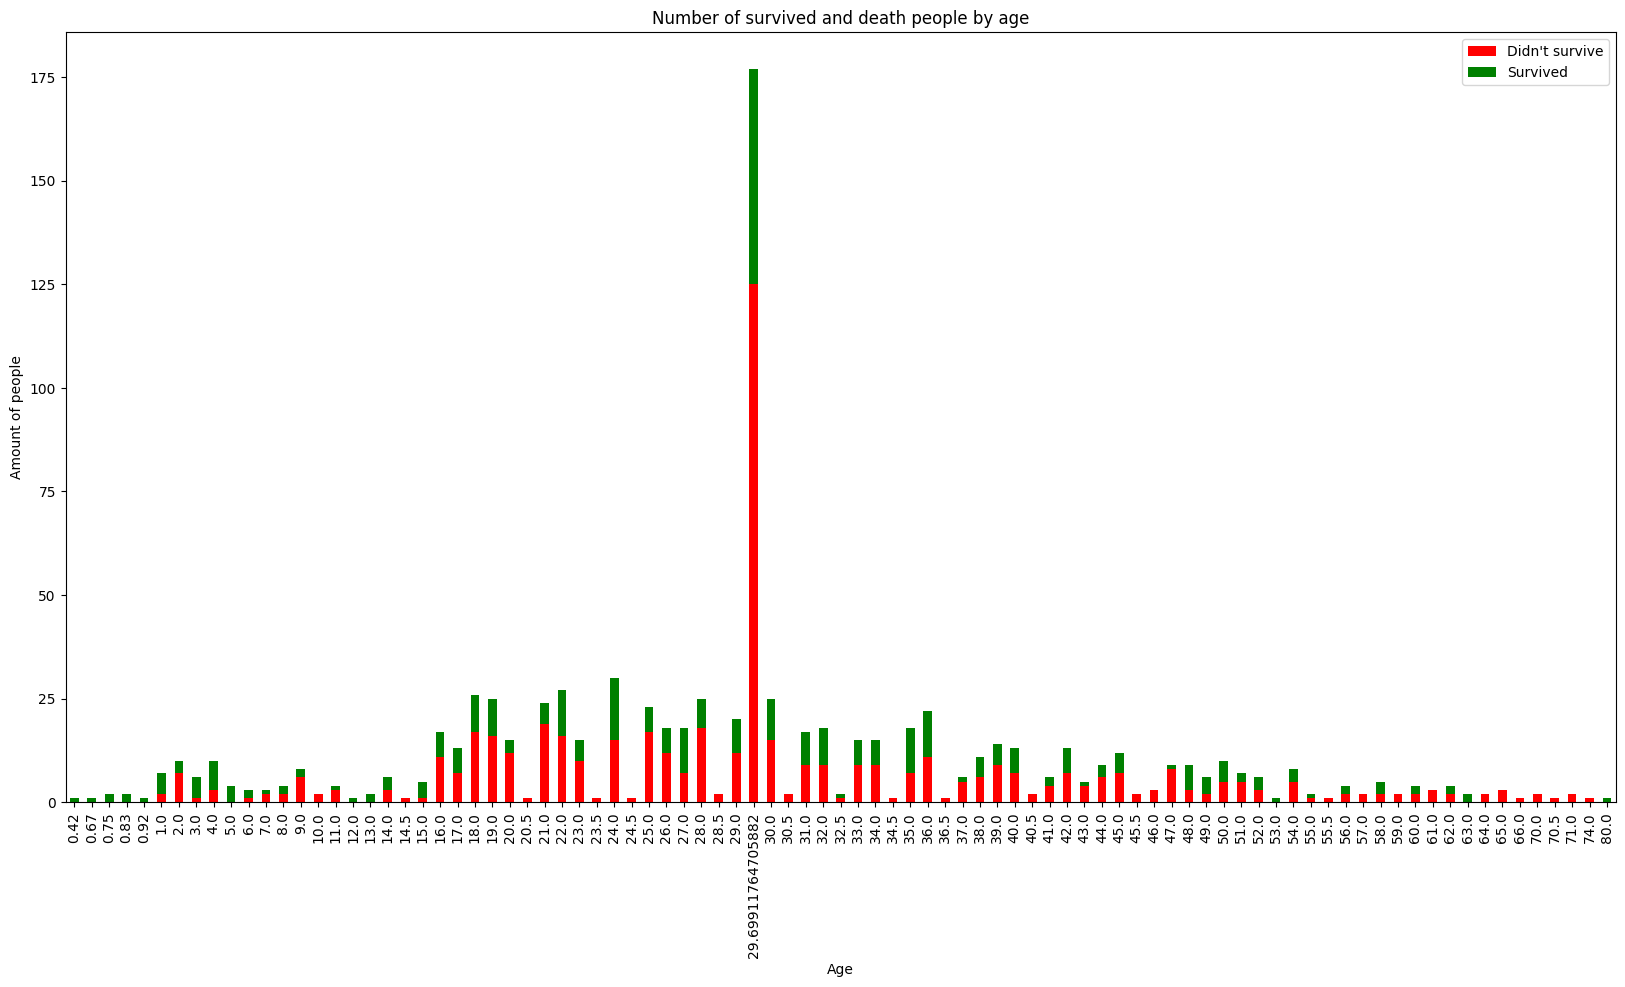

In [162]:
grouped = df_train_num.groupby(['Age', 'Survived']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(20, 10), color=['red', 'green'])
plt.title('Number of survived and death people by age')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.legend(["Didn't survive", 'Survived'])
plt.show()

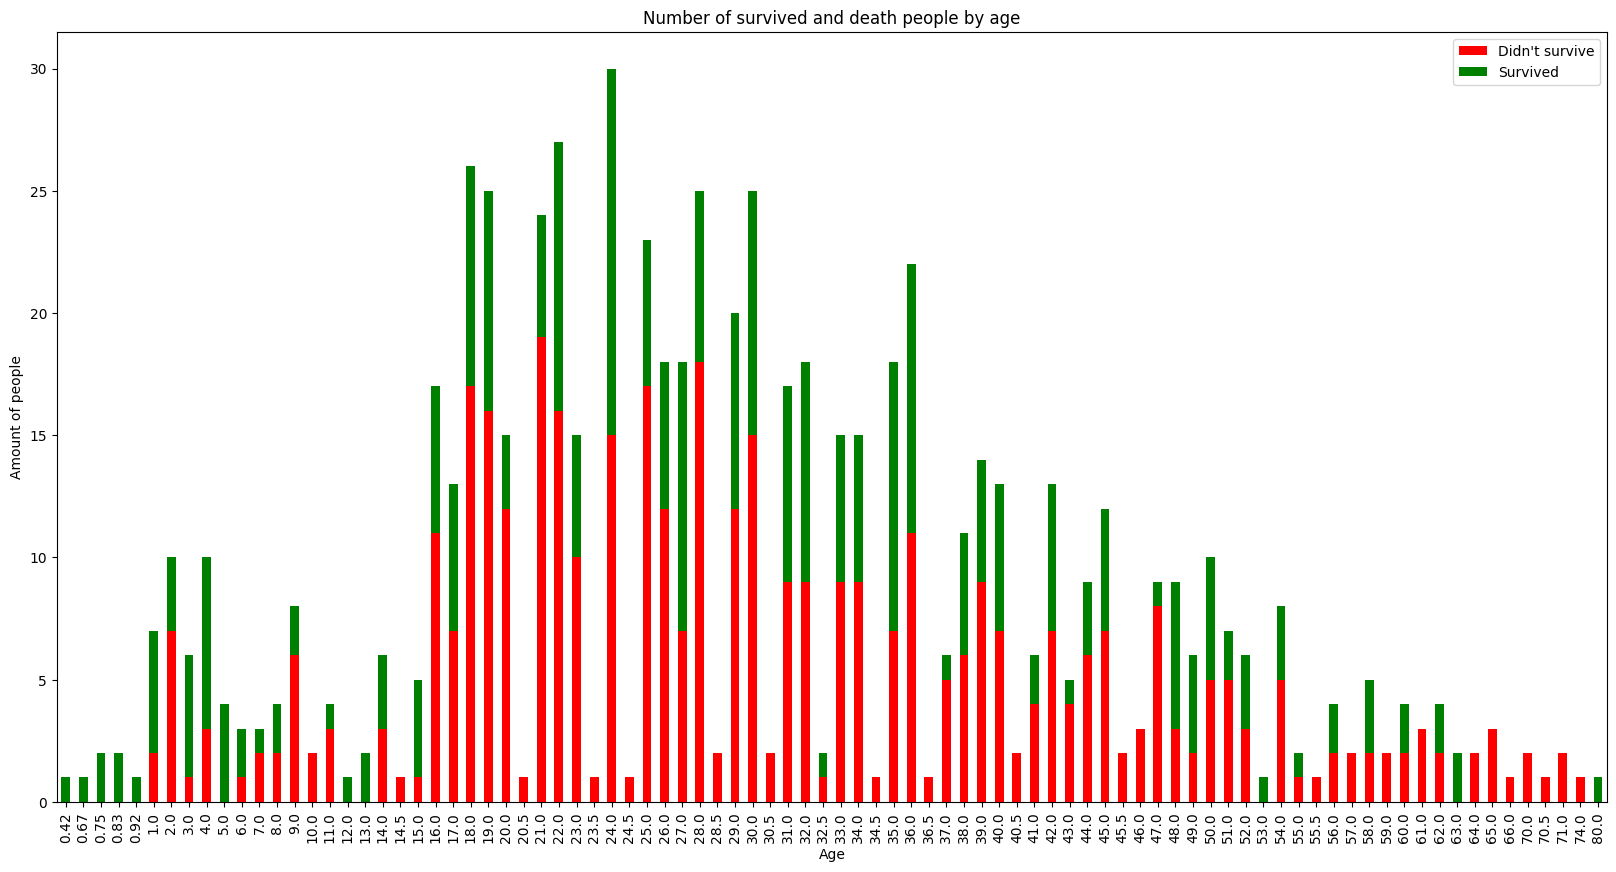

In [163]:
grouped = df_train.groupby(['Age', 'Survived']).size().unstack(fill_value=0)
grouped.plot(kind='bar', stacked=True, figsize=(20, 10), color=['red', 'green'])
plt.title('Number of survived and death people by age')
plt.xlabel('Age')
plt.ylabel('Amount of people')
plt.legend(["Didn't survive", 'Survived'])
plt.show()

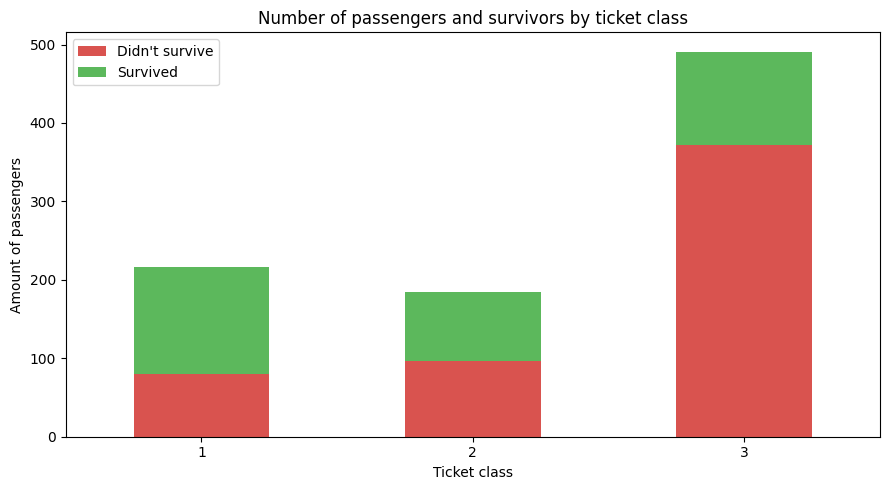

In [164]:
grouped = df_train_num.groupby('Pclass')['Survived'].value_counts().unstack()
fig, ax = plt.subplots(figsize=(9, 5))
grouped.plot(kind='bar', stacked=True, ax=ax, color=['#d9534f', '#5cb85c'])
ax.set_title('Number of passengers and survivors by ticket class')
ax.set_xlabel('Ticket class')
ax.set_ylabel('Amount of passengers')
ax.legend(["Didn't survive", 'Survived'])
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

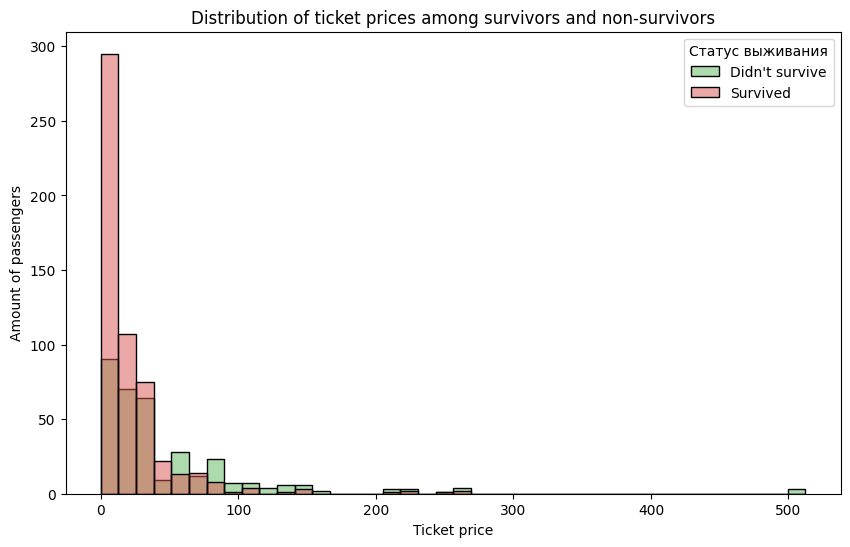

In [165]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(df_train_num, x='Fare', hue='Survived', kde=False, stat='count', common_norm=False, bins=40, palette=['#d9534f', '#5cb85c'], ax=ax, edgecolor='black')

ax.set_title('Distribution of ticket prices among survivors and non-survivors')
ax.set_xlabel('Ticket price')
ax.set_ylabel('Amount of passengers')
ax.legend(["Didn't survive", 'Survived'], title='Статус выживания')

plt.show()

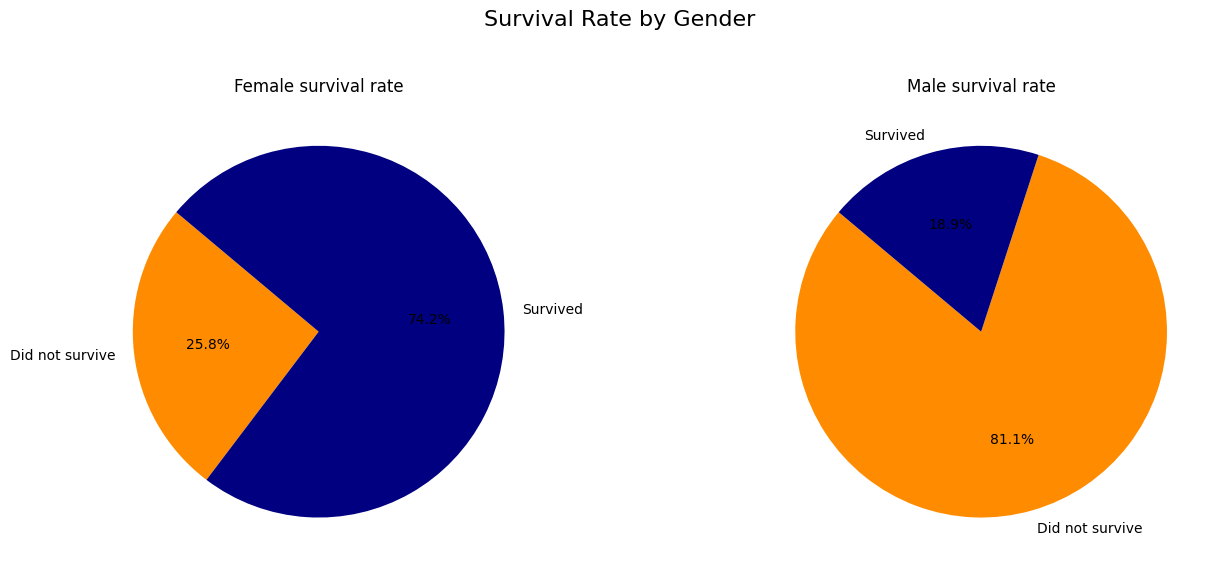

In [166]:
survival_counts = df_train.groupby('Sex')['Survived'].value_counts().unstack()

survival_percentages = survival_counts.div(survival_counts.sum(axis=1), axis=0) * 100

fig, axes = plt.subplots(1, 2, figsize=(14, 6))

labels = ['Did not survive', 'Survived']
colors = ['darkorange', 'navy']

for i, (sex, row) in enumerate(survival_percentages.iterrows()):
    ax = axes[i]
    ax.pie(row, labels=labels, autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(f'{sex.capitalize()} survival rate')

fig.suptitle('Survival Rate by Gender', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


<h1>Logistic regression</h1>

In [167]:
sql = lambda q: sqldf(q, globals())
query = """
SELECT df_train_num.PassengerId, df_train_num.Survived, df_train_num.Age, df_train_num.Pclass, df_train.Sex, df_train_num.Fare
FROM df_train_num
INNER JOIN df_train ON df_train_num.PassengerId = df_train.PassengerId
"""
df_train_final = sql(query)

In [168]:
df_train_final['Sex'] = df_train_final['Sex'].map({'male': 0, 'female': 1})
df_train_final.head()

,PassengerId,Survived,Age,Pclass,Sex,Fare
0,1,0,22.0,3,0,7.2500
1,2,1,38.0,1,1,71.2833
2,3,1,26.0,3,1,7.9250
3,4,1,35.0,1,1,53.1000
4,5,0,35.0,3,0,8.0500


In [169]:
df_test['Sex'] = df_test['Sex'].map({'male': 0, 'female': 1})
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S


In [170]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
dtype: int64

In [171]:
test_features_df = df_test[['Age', 'Pclass', 'Sex', 'Fare']]
test_features_df.head()

,Age,Pclass,Sex,Fare
0,34.5,3,0,7.8292
1,47.0,3,1,7.0000
2,62.0,2,0,9.6875
3,27.0,3,0,8.6625
4,22.0,3,1,12.2875


In [172]:
X_train = df_train_final[['Age', 'Pclass', 'Sex', 'Fare']]  # Признаки
y_train = df_train_final['Survived']  # Целевая переменная

X_train.head(), y_train.head()


(    Age  Pclass  Sex     Fare
 0  22.0       3    0   7.2500
 1  38.0       1    1  71.2833
 2  26.0       3    1   7.9250
 3  35.0       1    1  53.1000
 4  35.0       3    0   8.0500,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: Survived, dtype: int64)

In [173]:
log_reg_model = LogisticRegression(max_iter=1000)
log_reg_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [174]:
survived_predictions = log_reg_model.predict(test_features_df)

df_test['Survived_Prediction'] = survived_predictions

df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived_Prediction
0,892,3,"Kelly, Mr. James",0,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,47.0,1,0,363272,7.0000,NaN,S,0
2,894,2,"Myles, Mr. Thomas Francis",0,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",0,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,22.0,1,1,3101298,12.2875,NaN,S,1


In [175]:
df_submission['Survived'] = survived_predictions
df_submission

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [176]:
df_submission.to_csv('submission.csv', index=False)


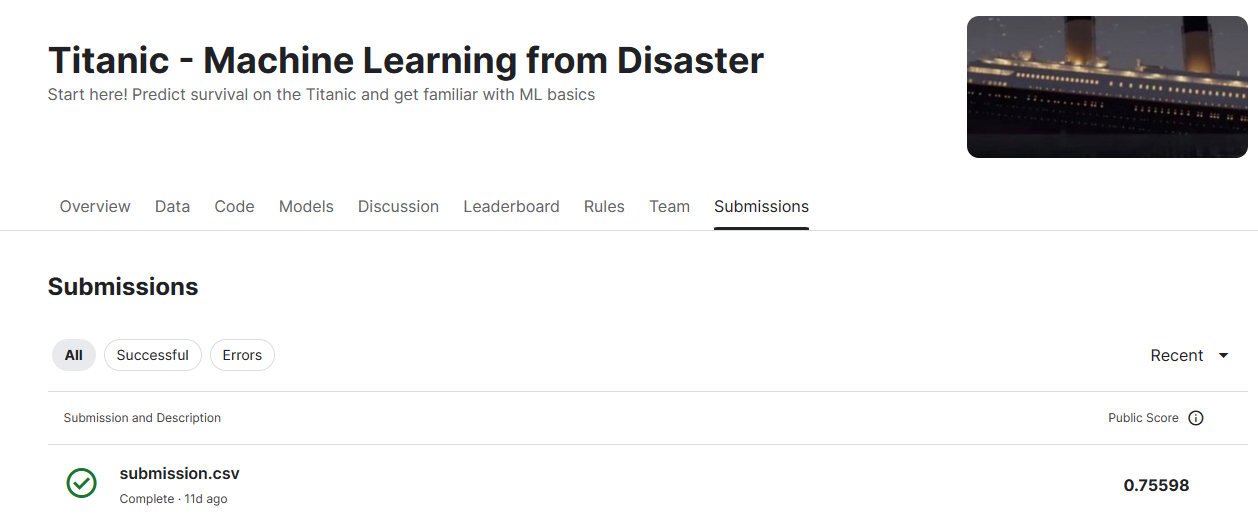